# **02**

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


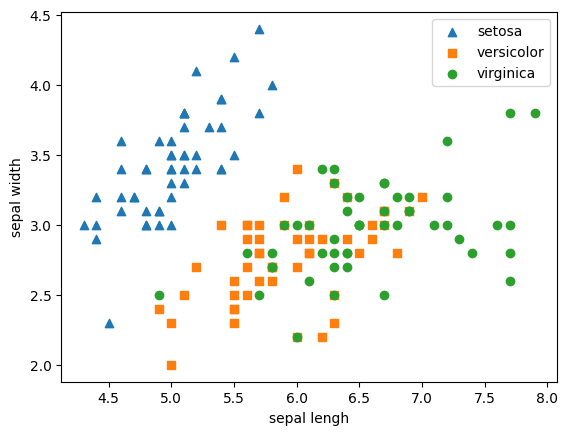

In [3]:
markers=['^', 's','o']

for i, marker in enumerate(markers):
  x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker = marker , label = iris.target_names[i])

plt.legend()

plt.xlabel('sepal lengh')
plt.ylabel('sepal width')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [6]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [10]:
pca_columns = ['pca_component_1','pca_componet_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_componet_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


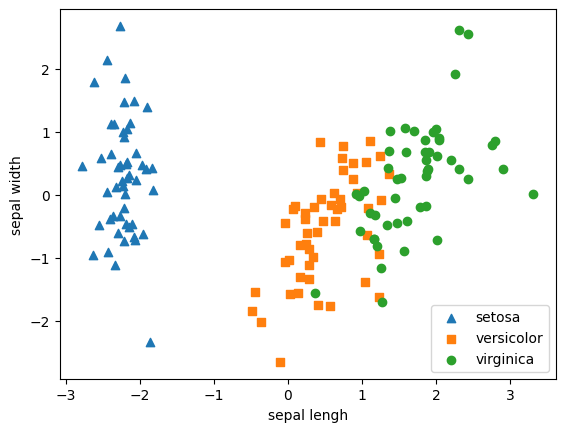

In [11]:
markers=['^', 's','o']

for i, marker in enumerate(markers):
  x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_componet_2']
  plt.scatter(x_axis_data, y_axis_data, marker = marker , label = iris.target_names[i])

plt.legend()

plt.xlabel('sepal lengh')
plt.ylabel('sepal width')
plt.show()

In [12]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('original data 교차 검증 개별 정확도:',  scores)
print('original data 평균 정확도:',  np.mean(scores))


original data 교차 검증 개별 정확도: [0.98 0.94 0.96]
original data 평균 정확도: 0.96


In [14]:
pca_X = irisDF_pca[['pca_component_1','pca_componet_2']]
score_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('pca transformed 교차 검증 개별 정확도:',  score_pca)
print('pca transformed 평균 정확도:',  np.mean(score_pca))


pca transformed 교차 검증 개별 정확도: [0.88 0.88 0.88]
pca transformed 평균 정확도: 0.88


In [28]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/default of credit card clients.xls').iloc[0:,1:]

print(df.shape)
df.head(3)

(30001, 24)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [29]:

# 첫 번째 행을 새로운 칼럼명으로 설정
df.columns = df.iloc[0]

# 첫 번째 행 삭제
df = df[1:]


df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:

df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)


y_target = df['default']
X_features = df.drop('default', axis=1)

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,fmt='.1g')

<ipython-input-35-2377d68d7aa0>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X_features.corr()


ValueError: ignored

<Figure size 1400x1400 with 0 Axes>

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명: ', cols_bill)

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component 별 변동성 : ', pca.explained_variance_ratio_)

대상 속성명:  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component 별 변동성 :  [0.90555253 0.0509867 ]


In [38]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators = 300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)
print('CV=3, 개별 Fole set 정확도:',  scores)
print('평균 정확도:{0.4f}'.format(np.mean(scores))  )


ValueError: ignored

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3, 개별 PCA변환된 개별 Fole set 정확도:',  scores)
print('PCA변환 평균 정확도:{0.4f}'.format(np.mean(scores))  )

ValueError: ignored

# **03**

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris=load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [42]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


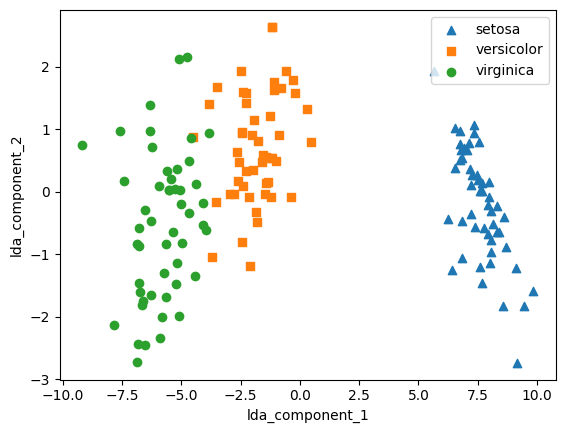

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

markers=['^', 's','o']

for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker = marker , label = iris.target_names[i])

plt.legend(loc='upper right')

plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

# **04**

In [46]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.rand(4,4)
print(np.round(a,3))

[[0.111 0.211 0.233 0.152]
 [0.83  0.408 0.556 0.746]
 [0.248 0.969 0.953 0.49 ]
 [0.018 0.858 0.405 0.622]]


In [48]:
U, Sigma,Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma matrix:\n', np.round(Sigma,3))
print('Vt matrix:\n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.169  0.001 -0.128 -0.977]
 [-0.541 -0.828  0.126  0.076]
 [-0.662  0.355 -0.63   0.197]
 [-0.491  0.434  0.756 -0.014]]
Sigma matrix:
 [2.153 0.725 0.356 0.007]
Vt matrix:
 [[-0.298 -0.612 -0.543 -0.492]
 [-0.815  0.522  0.075 -0.239]
 [-0.148  0.174 -0.714  0.662]
 [ 0.474  0.568 -0.436 -0.513]]


In [49]:
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U,Sigma_mat), Vt)
print(np.round(a_, 3))

[[0.111 0.211 0.233 0.152]
 [0.83  0.408 0.556 0.746]
 [0.248 0.969 0.953 0.49 ]
 [0.018 0.858 0.405 0.622]]


In [50]:
a[2] = a[0]+a[1]
a[3]=a[0]
print(np.round(a,3))

[[0.111 0.211 0.233 0.152]
 [0.83  0.408 0.556 0.746]
 [0.942 0.619 0.789 0.897]
 [0.111 0.211 0.233 0.152]]


In [51]:
U, Sigma,Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma matrix:\n', np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma matrix:
 [2.151 0.24  0.    0.   ]


In [55]:
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])

Vt_ = Vt[:2]

print(U.shape, Sigma.shape, Vt.shape)
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 4) (4,) (4, 4)
[[0.111 0.211 0.233 0.152]
 [0.83  0.408 0.556 0.746]
 [0.942 0.619 0.789 0.897]
 [0.111 0.211 0.233 0.152]]


In [56]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6,6))
print('originam Matrix: \n', matrix)

originam Matrix: 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]


In [58]:
U, Sigma, Vt = svd(matrix, full_matrices = False)
print('\n 분해 행렬 차원: ', U.shape, Sigma.shape, Vt.shape)
print('\n Sigma값 행렬: ', Sigma)

num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTrundated SVD 분해 행렬 차원: ', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTrundated SVD Sigma값 행렬: ', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

print('\nTruncated SVD 분해 후 복원 행렬: \n', matrix_tr)


 분해 행렬 차원:  (6, 6) (6,) (6, 6)

 Sigma값 행렬:  [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Trundated SVD 분해 행렬 차원:  (6, 4) (4,) (4, 6)

Trundated SVD Sigma값 행렬:  [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD 분해 후 복원 행렬: 
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.73812389]
 [0.59726589 0.47953891 0.56613544 0.80746028 0.13135039 0.03479656]]


Text(0, 0.5, 'Trundated Component 2')

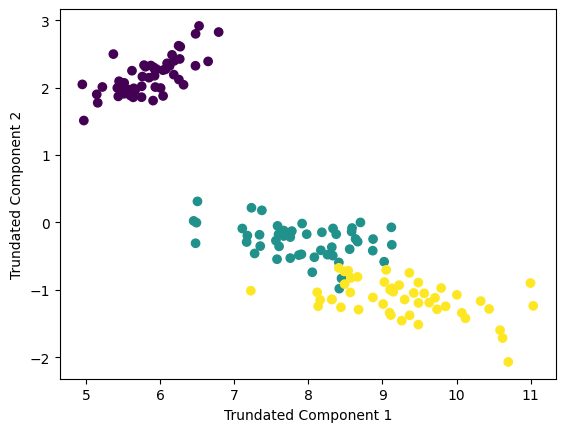

In [1]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)


plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c = iris.target)
plt.xlabel('Trundated Component 1')
plt.ylabel('Trundated Component 2')


Text(0.5, 1.0, 'PCA Transformed')

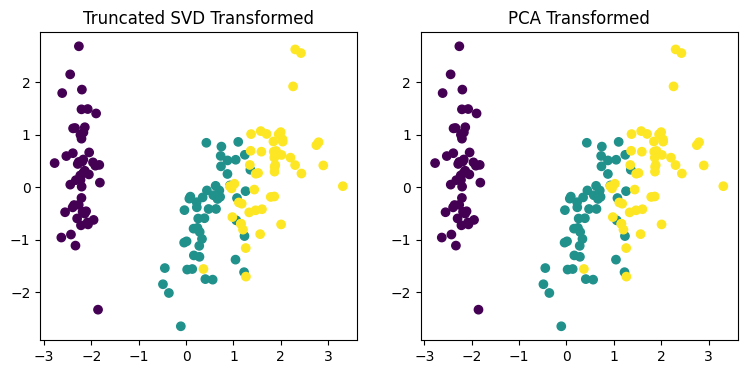

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c = iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c = iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

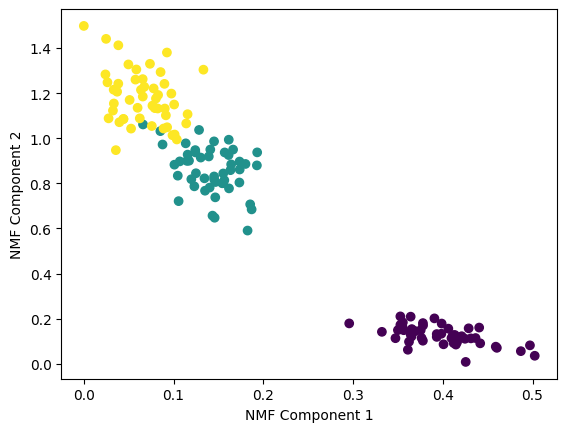

In [3]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')